### Note
* BLS Employment (Statistician) Analysis

In [110]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Files to Load 
file_to_load_2014 = "bls_cve/bls_2014.csv"
file_to_load_2015 = "bls_cve/bls_2015.csv"
file_to_load_2016 = "bls_cve/bls_2016.csv"
file_to_load_2017 = "bls_cve/bls_2017.csv"

# Read Files and store into Pandas data frame
bls_2014_df = pd.read_csv(file_to_load_2014, dtype='unicode')
bls_2015_df = pd.read_csv(file_to_load_2015, dtype='unicode')
bls_2016_df = pd.read_csv(file_to_load_2016, dtype='unicode')
bls_2017_df = pd.read_csv(file_to_load_2017, dtype='unicode')
bls_2014_df.head()

,NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,PCT_RPT,H_MEAN,...,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,YEAR
0,115100,Support Activities for Crop Production,15-1141,Database Administrators,detailed,70,17,0.02,1,35.94,...,43.87,59.54,"42,070","53,240","70,520","91,250","123,830",NaN,NaN,2014
1,115200,Support Activities for Animal Production,13-1161,Market Research Analysts and Marketing Special...,detailed,50,33.7,0.18,1,26.23,...,30.39,43.28,"28,640","40,660","45,680","63,220","90,030",NaN,NaN,2014
2,211100,Oil and Gas Extraction,13-1141,"Compensation, Benefits, and Job Analysis Speci...",detailed,200,8.5,0.1,1,35.48,...,41.59,54.31,"41,530","53,090","69,090","86,500","112,970",NaN,NaN,2014
3,211100,Oil and Gas Extraction,13-1161,Market Research Analysts and Marketing Special...,detailed,320,10.2,0.17,2,39.28,...,48.03,66.19,"41,760","54,570","74,950","99,900","137,680",NaN,NaN,2014
4,211100,Oil and Gas Extraction,13-2031,Budget Analysts,detailed,60,26.5,0.03,~,43.42,...,50.1,63.68,"51,830","64,880","83,730","104,210","132,450",NaN,NaN,2014


In [111]:
# Clean up data. Remove non-numeric values/remove commas/convert to number
bls_cleaned_2014_df = bls_2014_df[bls_2014_df.TOT_EMP != '**']
bls_cleaned_2014_df.loc[:, 'TOT_EMP'] = bls_cleaned_2014_df['TOT_EMP'].str.replace(',', '')
bls_cleaned_2014_df['TOT_EMP'] = pd.to_numeric(bls_cleaned_2014_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2015_df = bls_2015_df[bls_2015_df.TOT_EMP != '**']
bls_cleaned_2015_df.loc[:, 'TOT_EMP'] = bls_cleaned_2015_df['TOT_EMP'].str.replace(',', '')
bls_cleaned_2015_df['TOT_EMP'] = pd.to_numeric(bls_cleaned_2015_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2016_df = bls_2016_df[bls_2016_df.TOT_EMP != '**']
bls_cleaned_2016_df.loc[:, 'TOT_EMP'] = bls_cleaned_2016_df['TOT_EMP'].str.replace(',', '')
bls_cleaned_2016_df['TOT_EMP'] = pd.to_numeric(bls_cleaned_2016_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2017_df = bls_2017_df[bls_2017_df.TOT_EMP != '**']
bls_cleaned_2017_df.loc[:, 'TOT_EMP'] = bls_cleaned_2017_df['TOT_EMP'].str.replace(',', '')
bls_cleaned_2017_df['TOT_EMP'] = pd.to_numeric(bls_cleaned_2017_df['TOT_EMP']).fillna(0).astype(int)

In [112]:
# Create new datafromes to contain total emploee number for each occ_title
emp_2014_df = bls_cleaned_2014_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2015_df = bls_cleaned_2015_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2016_df = bls_cleaned_2016_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2017_df = bls_cleaned_2017_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2017_df

,TOT_EMP
OCC_TITLE,
Actuaries,18700
Budget Analysts,52850
"Compensation, Benefits, and Job Analysis Specialists",79340
Computer Systems Analysts,577610
Credit Analysts,73470
Database Administrators,112240
Financial Analysts,289830
Information Security Analysts,103700
Market Research Analysts and Marketing Specialists,594250


In [127]:
# Merge above dataframes and rename coloumns
emp_2014_2015_df = pd.merge(emp_2014_df, emp_2015_df, on='OCC_TITLE', how='outer')
emp_2014_2015_df = emp_2014_2015_df.rename(columns={"TOT_EMP_x":"2014", "TOT_EMP_y":"2015"})

emp_2014_2015_2016_df = pd.merge(emp_2014_2015_df, emp_2016_df, on='OCC_TITLE', how='outer')
emp_2014_2015_2016_df = emp_2014_2015_2016_df.rename(columns={"TOT_EMP":"2016"})

emp_df = pd.merge(emp_2014_2015_2016_df, emp_2017_df, on='OCC_TITLE', how='outer')
emp_df = emp_df.rename(columns={"TOT_EMP":"2017"})
emp_df

,2014,2015,2016,2017
OCC_TITLE,,,,
Actuaries,21160,19420,19550,18700
Budget Analysts,54760,54150,52520,52850
"Compensation, Benefits, and Job Analysis Specialists",79090,78030,77580,79340
Computer Systems Analysts,524850,550830,563280,577610
Credit Analysts,67980,69390,71480,73470
Database Administrators,110430,112050,112050,112240
Financial Analysts,258800,264840,279820,289830
Information Security Analysts,77210,82870,94710,103700
Market Research Analysts and Marketing Specialists,466940,504920,556730,594250


Text(0.5, 1.0, 'Total Number of Employment Change (Statistician)')

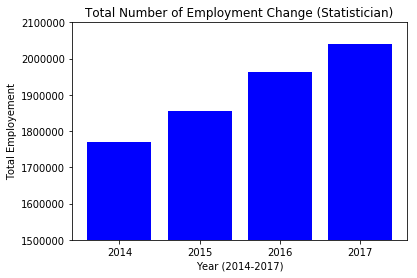

In [152]:
x_axis_year = np.arange(4)
y_axis_total = [emp_df['2014'].sum(), emp_df['2015'].sum(), emp_df['2016'].sum(), emp_df['2017'].sum()]

summary_bar = plt.bar(x_axis_year, y_axis_total, color='blue', align="center")

tick_locations = [value for value in x_axis_year]
plt.xticks(tick_locations, ["2014", "2015", "2016", "2017"])

plt.ylim(1500000, 2100000)

plt.xlabel('Year (2014-2017)')
plt.ylabel('Total Employement')
plt.title('Total Number of Employment Change (Statistician)')

In [ ]:
plt.show()

In [128]:
emp_plot_df = emp_df.transpose()
emp_plot_df.reset_index(inplace=True)
emp_plot_df

OCC_TITLE,index,Actuaries,Budget Analysts,"Compensation, Benefits, and Job Analysis Specialists",Computer Systems Analysts,Credit Analysts,Database Administrators,Financial Analysts,Information Security Analysts,Market Research Analysts and Marketing Specialists,Operations Research Analysts,Statisticians
0,2014,21160,54760,79090,524850,67980,110430,258800,77210,466940,82550,25200
1,2015,19420,54150,78030,550830,69390,112050,264840,82870,504920,90710,28960
2,2016,19550,52520,77580,563280,71480,112050,279820,94710,556730,103450,32730
3,2017,18700,52850,79340,577610,73470,112240,289830,103700,594250,102240,35190


Text(0, 0.5, 'Total Employement')

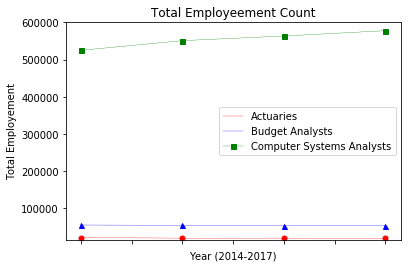

In [138]:
ax = emp_plot_df.plot('index', 'Actuaries', marker='o', markersize=5, linewidth=0.3, c='red', label='Actuaries', title='Total Employeement Count')
emp_plot_df.plot('index', 'Budget Analysts', marker='^', markersize=5, linewidth=0.3, c='blue', label='Budget Analysts', ax=ax)
emp_plot_df.plot('index', 'Computer Systems Analysts', marker='s', markersize=5, linewidth=0.3, c='green', label='Computer Systems Analysts', ax=ax)


#plt.xlim(2014, 2017)
plt.ylim(15000, 600000)
#plt.grid()
plt.xlabel('Year (2014-2017)')
plt.ylabel('Total Employement')
#plt.legend(loc='lower left', fontsize='small')

In [133]:
plt.show()